In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./genome_quality_report.tsv", sep="\t")
df.head()

,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes
0,3045160_421,97.65,2.79,Gradient Boost (General Model),11,0.899,125725,287.254945,1740059,0.45,1820,NaN
1,2202732_9,97.17,4.17,Neural Network (Specific Model),11,0.911,21715,239.937397,1435948,0.30,1821,NaN
2,1714258_3,90.05,0.06,Neural Network (Specific Model),11,0.853,98570,241.859750,1760081,0.61,2082,NaN
3,2020860_61,99.92,1.06,Neural Network (Specific Model),11,0.894,590720,275.321820,2180697,0.46,2374,NaN
4,94694_5,99.45,0.14,Neural Network (Specific Model),11,0.892,26831,279.394387,1268528,0.45,1354,NaN


Text(0.5, 1.0, 'Genome Quality Assessment')

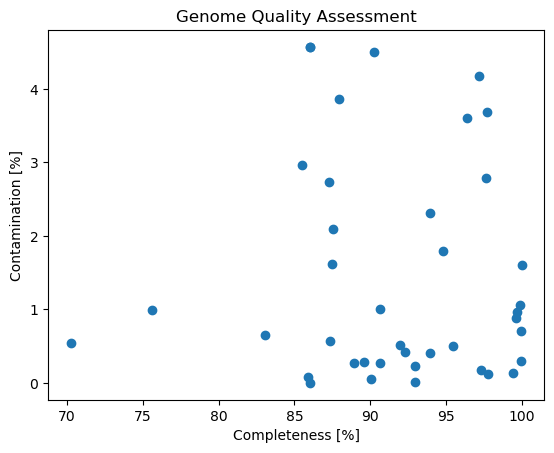

In [5]:
plt.scatter(x=df["Completeness"], y=df["Contamination"])
plt.xlabel("Completeness [%]")
plt.ylabel("Contamination [%]")
plt.title("Genome Quality Assessment")

# Extract tRNA number from BV-BRC

In [6]:
import requests
import json

In [7]:
# Use API 
n_trna = []
for name in df["Name"]:
    name = name.replace("_", ".")
    result = requests.get(f"https://www.bv-brc.org/api/genome/{name}")
    result_dict = json.loads(result.text)
    n_trna.append(result_dict["trna"])    

In [8]:
# Add tRNA number to df
df["n_trna"] = n_trna

In [9]:
# Save result to csv
df.to_csv("./genome_quality_report_result.csv")

## Plot Genome size vs. Number of tRNAs

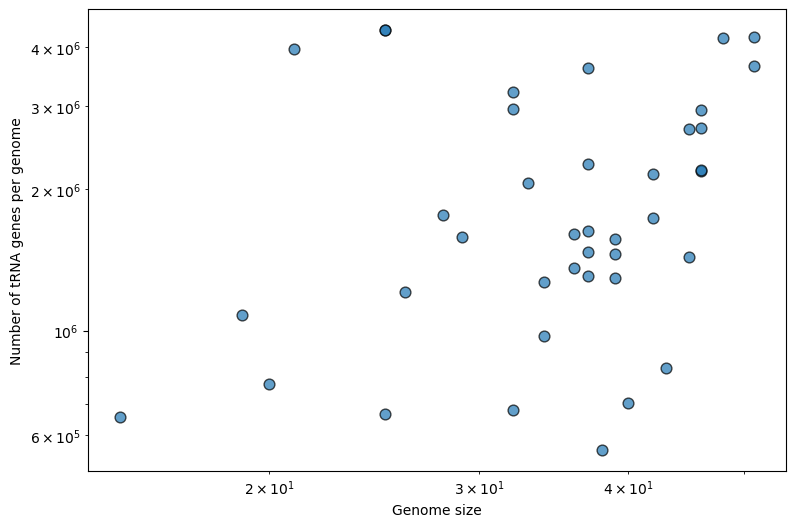

In [10]:
y_trna=df["Genome_Size"]
x_genome_size=df["n_trna"]
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(x_genome_size, y_trna, s=60, alpha=0.7, edgecolors="k")

ax.set_ylabel("Number of tRNA genes per genome")
ax.set_xlabel("Genome size")
ax.set_xscale("log")
ax.set_yscale("log")

## Plot Number of protein-coding sequences per genome vs. Number of tRNAs

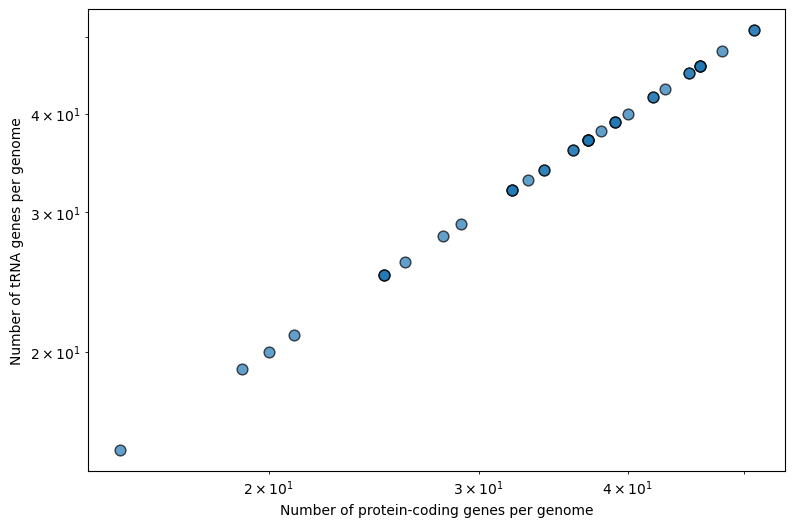

In [11]:
y_trna=df["n_trna"]
x_genome_n_genes=df["Total_Coding_Sequences"]
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(x_genome_size, y_trna, s=60, alpha=0.7, edgecolors="k")

ax.set_ylabel("Number of tRNA genes per genome")
ax.set_xlabel("Number of protein-coding genes per genome")
ax.set_xscale("log")
ax.set_yscale("log")